In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('C:/pypy/Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [4]:
df.isnull().values.any()

False

<AxesSubplot:>

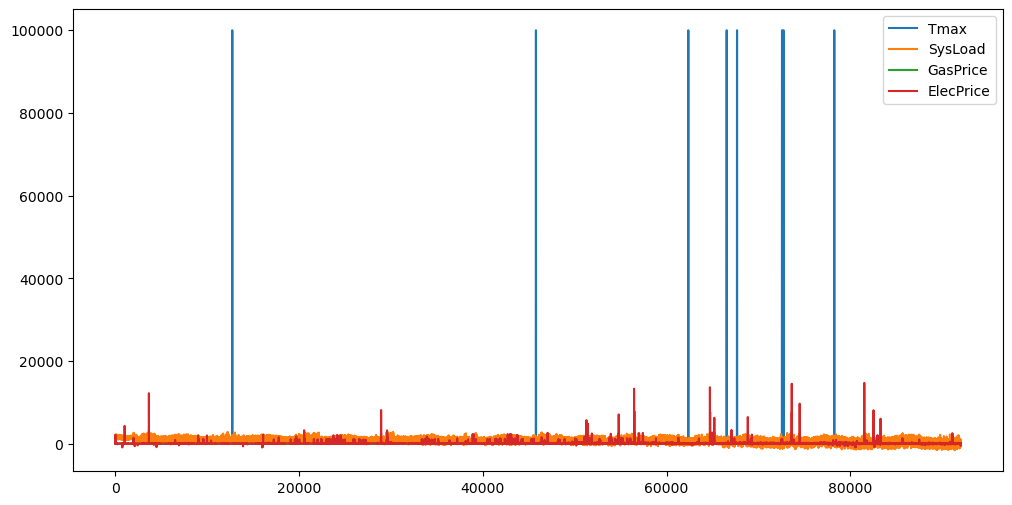

In [5]:
df.plot(figsize=(12,6))

In [6]:
df['FullDate']=pd.to_datetime(df['FullDate'])

In [7]:
df.set_index('FullDate',inplace=True)
#Downsampling
df=df.resample('D').mean()

In [8]:
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,15.8,1731.890833,3.69,114.654167
2010-09-02,15.4,1620.791250,3.69,23.783750
2010-09-03,18.3,1736.073333,4.45,21.040625
2010-09-04,13.7,1484.920208,3.39,20.928125
2010-09-05,14.9,1483.808750,4.45,20.856458


<AxesSubplot:xlabel='FullDate'>

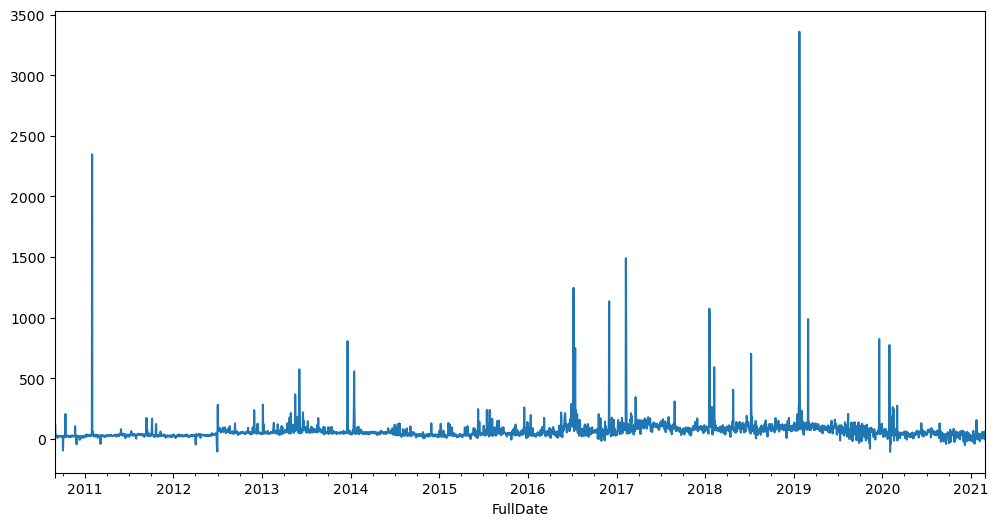

In [9]:
df['ElecPrice'].plot(figsize=(12,6))

In [10]:
import statsmodels.api as sm
from pylab import rcParams

Text(0, 0.5, 'ElecPrice')

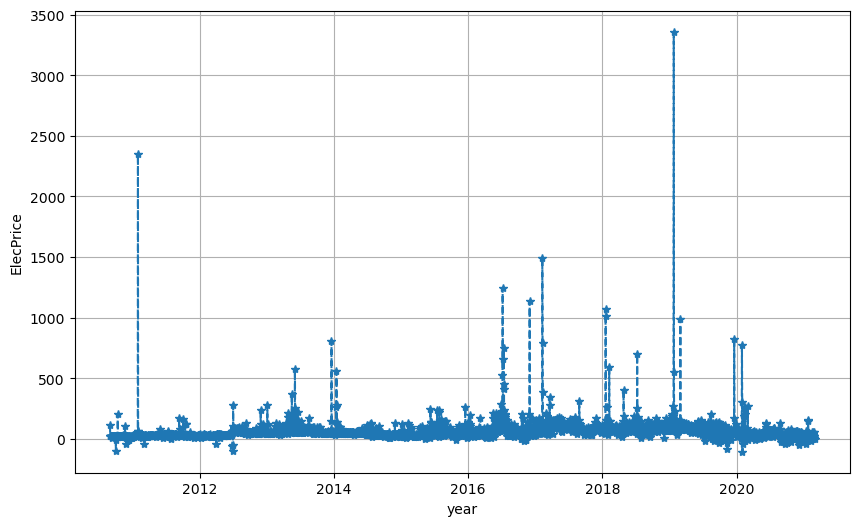

In [11]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df.ElecPrice,'--',marker='*')
plt.grid()
plt.xlabel('year')
plt.ylabel('ElecPrice')

In [12]:
MA=df['ElecPrice'].rolling(12).mean()

Text(0.5, 1.0, 'Smoothing')

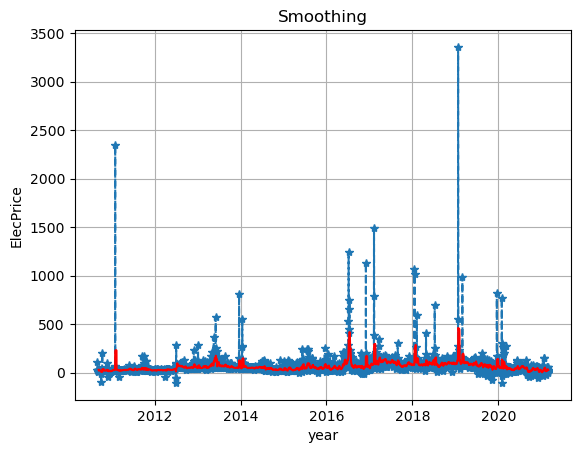

In [13]:
plt.plot(df.index,df.ElecPrice,'--',marker='*')
plt.plot(df.index,MA,'red')
plt.grid()
plt.xlabel('year')
plt.ylabel('ElecPrice')
plt.title('Smoothing')

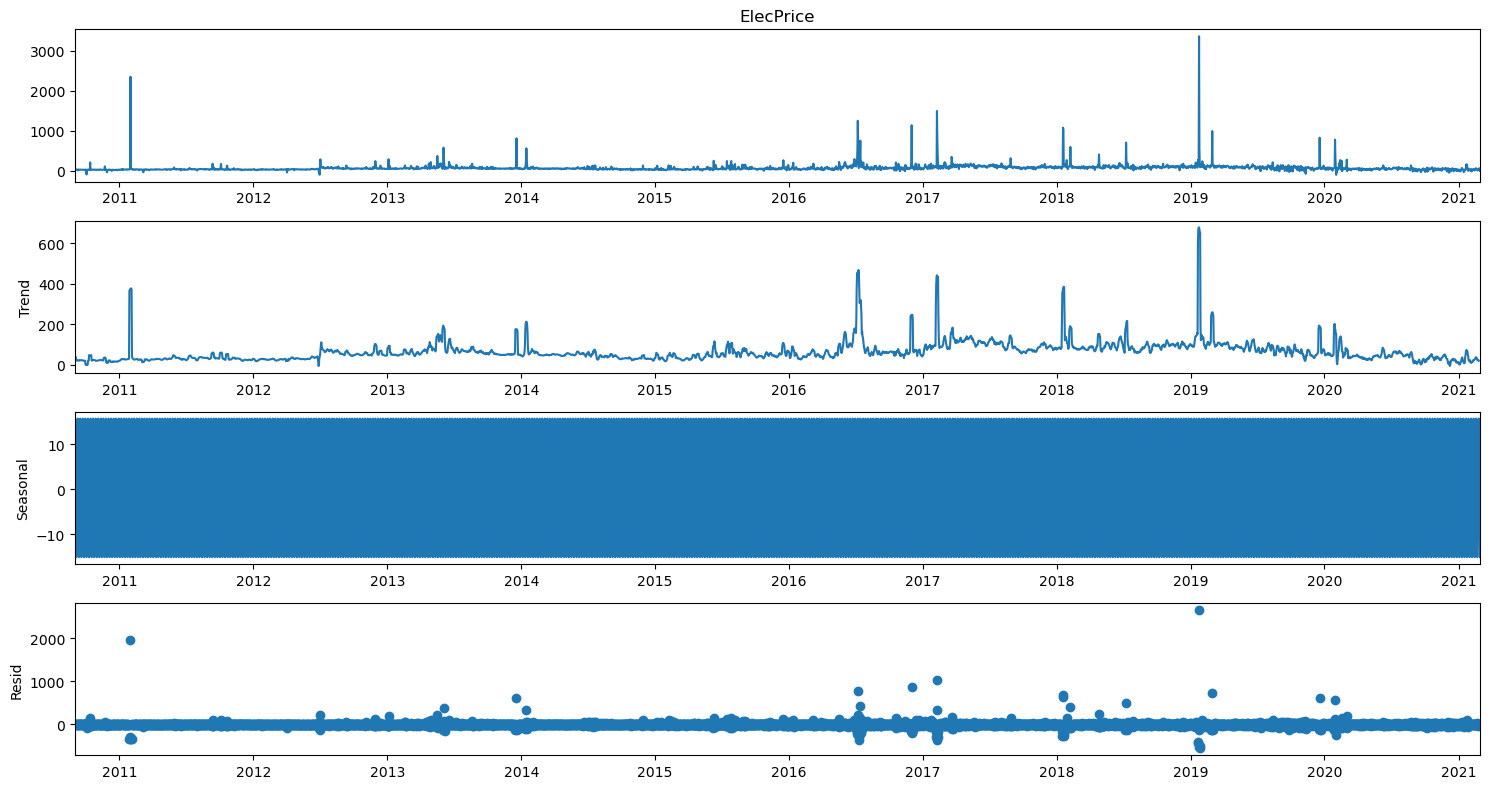

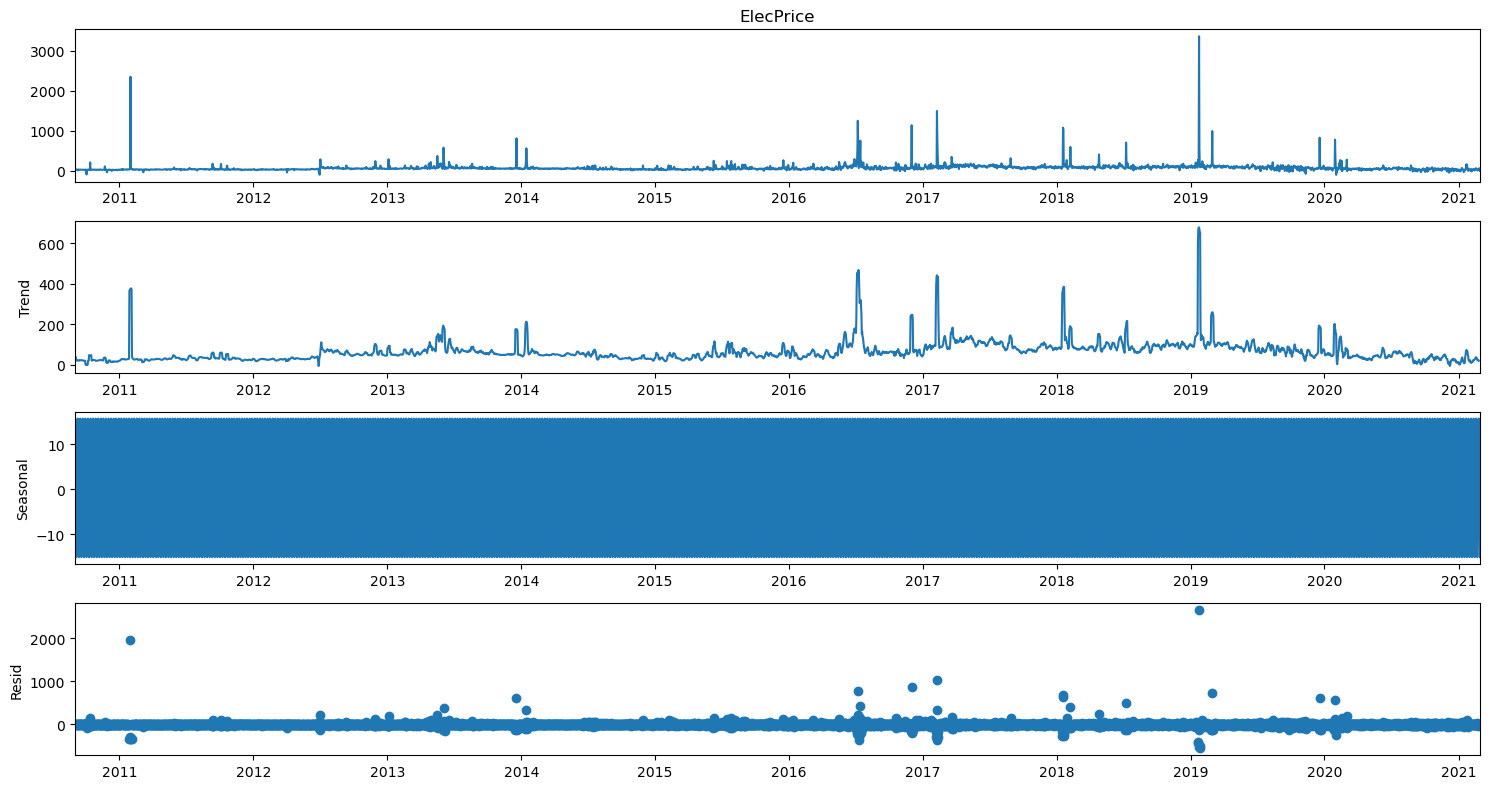

In [14]:
rcParams['figure.figsize']=15,8
decompose_series=sm.tsa.seasonal_decompose(df['ElecPrice'],model='additive')
decompose_series.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller
df_adf=adfuller(df.ElecPrice)
df_adf

(-8.26905386687384,
 4.848817773710578e-13,
 20,
 3813,
 {'1%': -3.432066157296446,
  '5%': -2.8622983040036005,
  '10%': -2.5671736550459663},
 44958.0861741366)

In [16]:
#df_adf[2] is <0.5 therefore the data is stationary

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [18]:
#plot_acf(df['ElecPrice'],lags=range(0,20))
#plt.show()
#plot_pacf(df['ElecPrice'],lags=range(0,20))
#plt.show()

In [19]:
from prophet import Prophet

In [20]:
df=df.reset_index('FullDate')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,15.8,1731.890833,3.69,114.654167
1,2010-09-02,15.4,1620.791250,3.69,23.783750
2,2010-09-03,18.3,1736.073333,4.45,21.040625
3,2010-09-04,13.7,1484.920208,3.39,20.928125
4,2010-09-05,14.9,1483.808750,4.45,20.856458


In [21]:
dt=df.rename(columns={'FullDate':'ds','ElecPrice':'y'})
dt=dt.drop(['Tmax','SysLoad','GasPrice'],axis=1)
dt.head()

,ds,y
0,2010-09-01,114.654167
1,2010-09-02,23.783750
2,2010-09-03,21.040625
3,2010-09-04,20.928125
4,2010-09-05,20.856458


In [22]:
train=dt[:2757]
test=dt[2757:]
len(test)

1077

In [23]:
model=Prophet()

In [24]:
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [25]:
future=model.make_future_dataframe(periods=1077, freq='D')
forecast=model.predict(future)
forecast.head()

C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,35.261078,-67.989734,139.094487,35.261078,35.261078,6.009343,6.009343,6.009343,6.640358,6.640358,6.640358,-0.631015,-0.631015,-0.631015,0.0,0.0,0.0,41.270421
1,2010-09-02,35.259495,-50.043128,141.062449,35.259495,35.259495,9.355758,9.355758,9.355758,10.713429,10.713429,10.713429,-1.357671,-1.357671,-1.357671,0.0,0.0,0.0,44.615253
2,2010-09-03,35.257912,-57.479196,133.221768,35.257912,35.257912,-0.020189,-0.020189,-0.020189,2.094872,2.094872,2.094872,-2.115062,-2.115062,-2.115062,0.0,0.0,0.0,35.237723
3,2010-09-04,35.256329,-71.840122,124.140111,35.256329,35.256329,-14.199801,-14.199801,-14.199801,-11.310576,-11.310576,-11.310576,-2.889225,-2.889225,-2.889225,0.0,0.0,0.0,21.056529
4,2010-09-05,35.254746,-78.795132,126.505276,35.254746,35.254746,-17.948294,-17.948294,-17.948294,-14.280907,-14.280907,-14.280907,-3.667387,-3.667387,-3.667387,0.0,0.0,0.0,17.306452


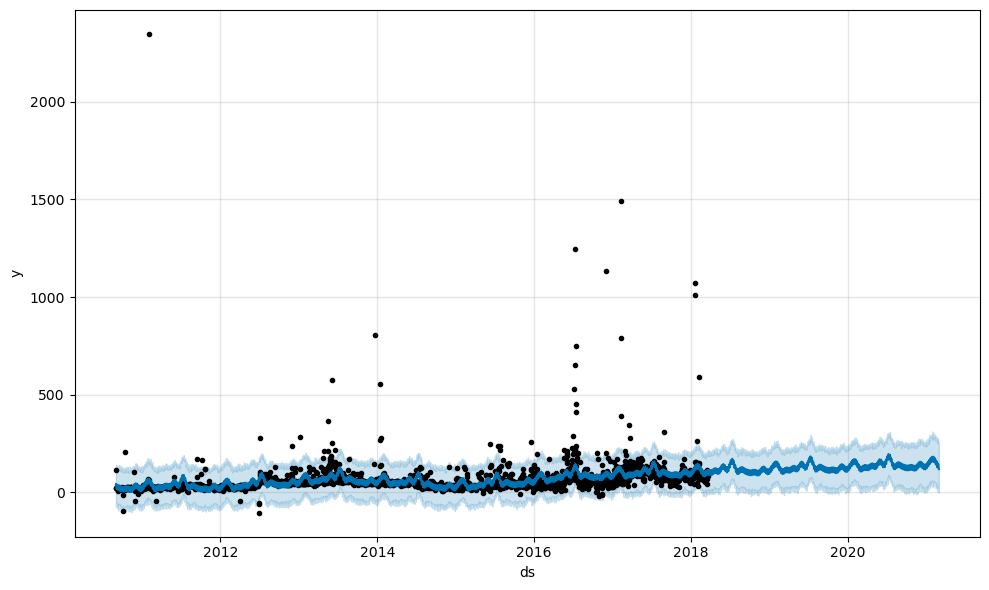

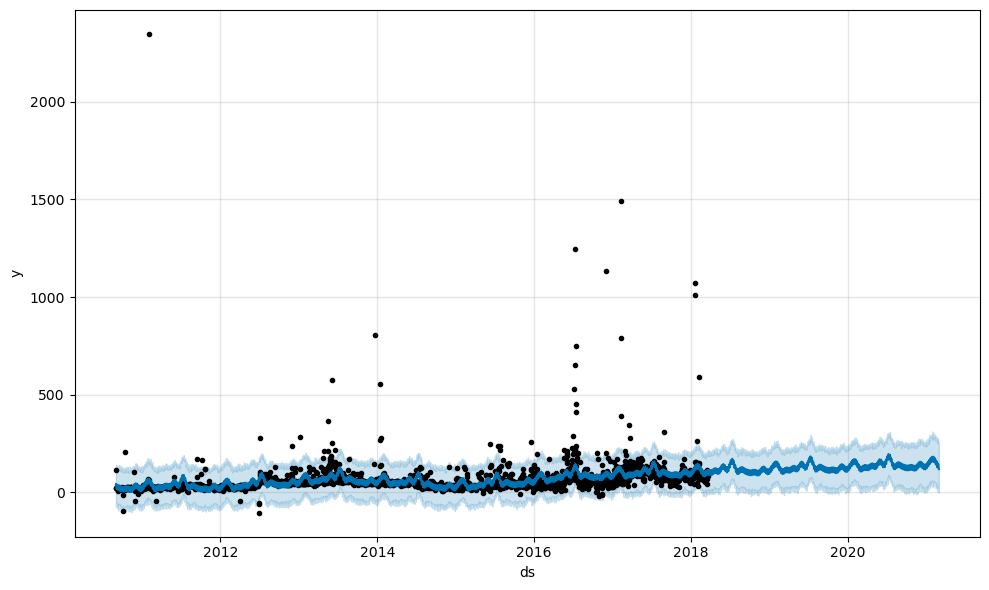

In [26]:
model.plot(forecast)

In [27]:
#Calculate MAPE

def mape(actual, pred): 
    actual=np.array(actual)
    pred=np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [28]:
mape(test.y,forecast['yhat'][2757:])

548.905447559877

In [29]:
mape(train.y,forecast['yhat'][:2757])

59.523710469451196

In [30]:
#calculate rmse
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual = train.y
predicted = forecast['yhat'][:2757]

mse = sklearn.metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

77.62128497931519


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

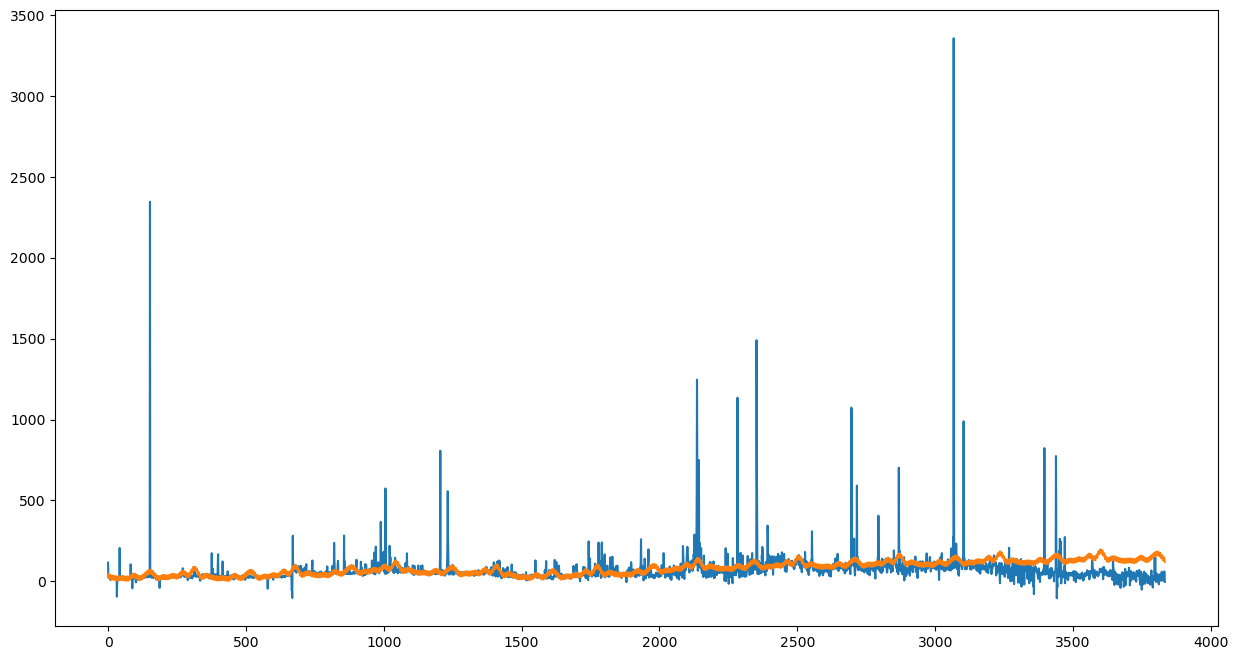

In [33]:
plt.plot(dt.y)
plt.plot(forecast['yhat'])
plt.plot

In [34]:
df=df.rename(columns={'FullDate':'ds','ElecPrice':'y'})
df.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,15.8,1731.890833,3.69,114.654167
1,2010-09-02,15.4,1620.791250,3.69,23.783750
2,2010-09-03,18.3,1736.073333,4.45,21.040625
3,2010-09-04,13.7,1484.920208,3.39,20.928125
4,2010-09-05,14.9,1483.808750,4.45,20.856458


In [35]:
train2=df[:2757]
test2=df[2757:]
len(test2)

1077

In [36]:
# Q 17-19
model2=Prophet(interval_width=0.9)
model2.add_regressor('Tmax',standardize=False)
model2.add_regressor('SysLoad',standardize=False)
model2.add_regressor('GasPrice',standardize=False)

In [37]:
model2.fit(train2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [38]:
testt=test2.drop('y',axis=1)
testt.head()

,ds,Tmax,SysLoad,GasPrice
2757,2018-03-20,22.5,320.704637,8.3995
2758,2018-03-21,23.8,194.085777,8.4690
2759,2018-03-22,30.1,798.407719,8.4690
2760,2018-03-23,33.8,753.768098,8.2769
2761,2018-03-24,34.7,156.814110,7.5090


In [39]:
forecast2=model2.predict(testt)

C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [40]:
mape(test2.y,forecast2['yhat'])

100.49652750683448

In [41]:
#rmse
mse = sklearn.metrics.mean_squared_error(test2.y, forecast2['yhat'])

rmse = math.sqrt(mse)

print(rmse)

115.01896224300042


In [42]:
from statsmodels.tsa.stattools import adfuller
df_adf=adfuller(df.SysLoad)
df_adf

(-3.6901589888366453,
 0.004253725504574128,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 54930.737615237456)

In [43]:
df_adf=adfuller(df.GasPrice)
df_adf

(-2.9027666971651835,
 0.045027212884624954,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '5%': -2.8622996992165364,
  '10%': -2.5671743978048323},
 8685.261996278325)

In [44]:
df_adf=adfuller(dt.y)
df_adf

(-8.26905386687384,
 4.848817773710578e-13,
 20,
 3813,
 {'1%': -3.432066157296446,
  '5%': -2.8622983040036005,
  '10%': -2.5671736550459663},
 44958.0861741366)

In [45]:
#calculate rmse
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual = test.y
predicted = forecast['yhat'][2757:]
#mse = sklearn.metrics.mean_squared_error(test2.y, forecast2['yhat'])

mse = sklearn.metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

134.03718618953855


C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Jane Ijeoma\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


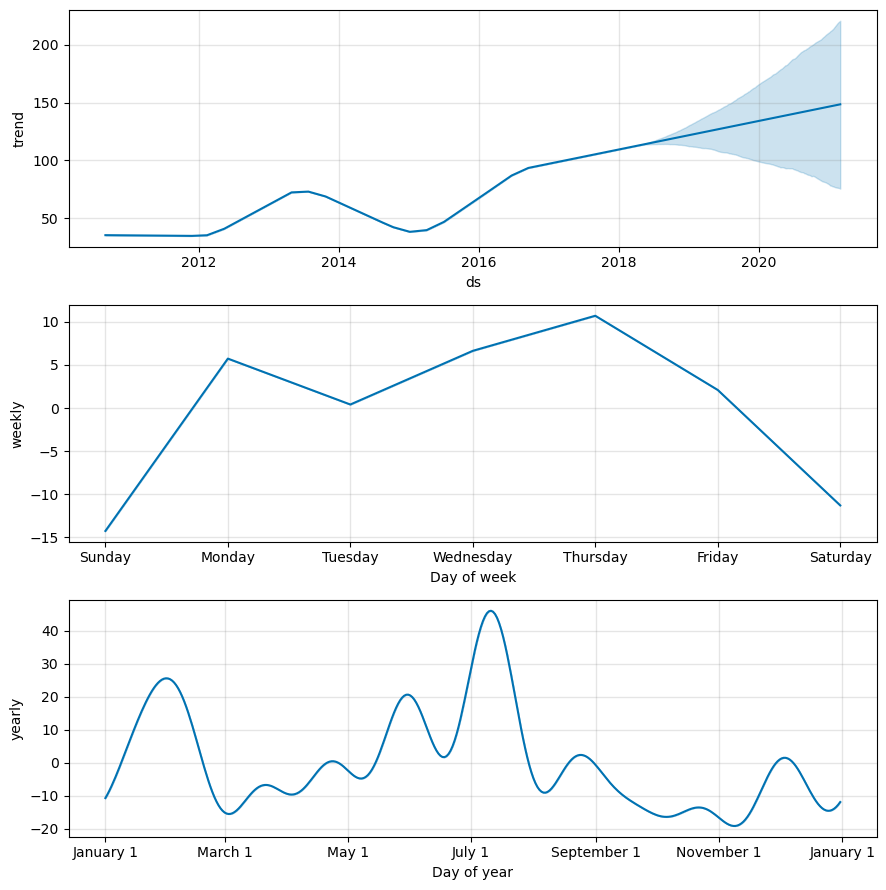

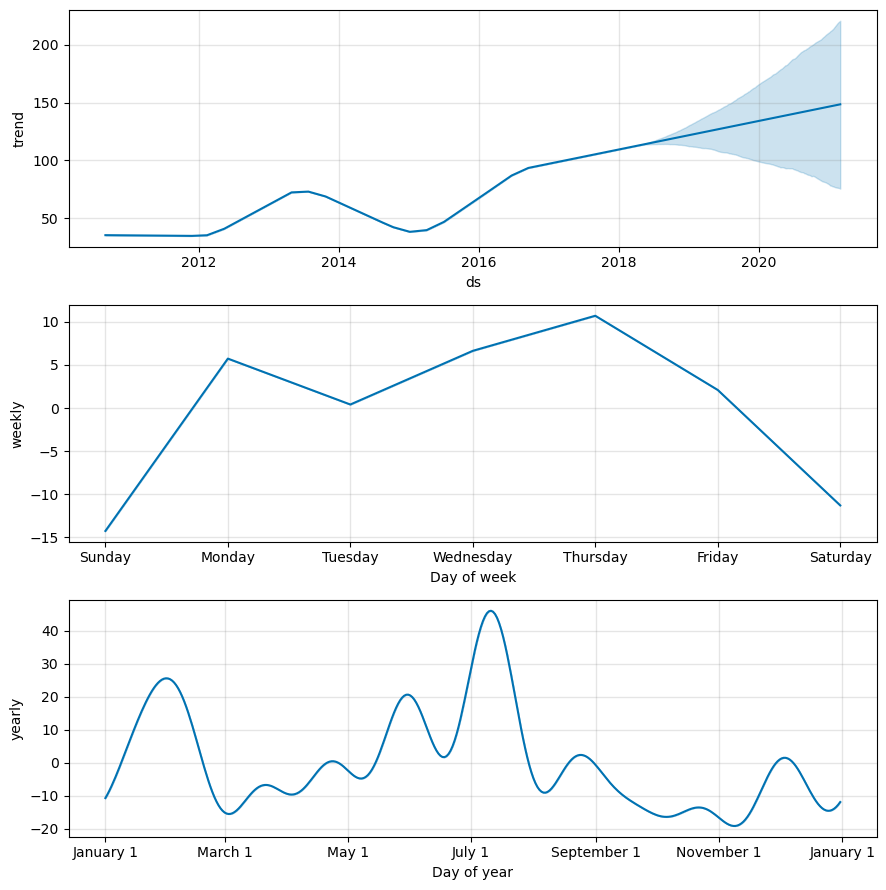

In [46]:
model.plot_components(forecast)